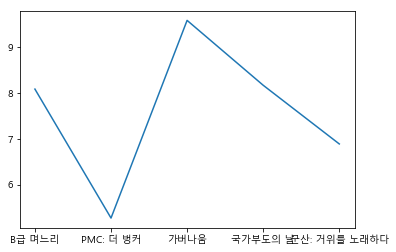

In [110]:
# 20190122 ~ 20190221 네이버 영화 제목에 대한 평점에 대한 평균을 구하고 그래프로 출력하시오


from bs4 import BeautifulSoup
import urllib.request
import urllib.parse

import pandas as pd

date = pd.date_range(start='20190122', end='20190221')
data = []

for d in date :
    
    d = str(d).split( )[0].replace('-','')
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=" + d
    
    
    with urllib.request.urlopen(url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')

    titles = soup.find_all("div",{"class":"tit5"})
    ratings = soup.find_all("td",{"class":"point"})
    
  
    for i in range(0, len(titles)):
        data.append([titles[i].a.string, float(ratings[i].string)])

data = pd.DataFrame(data, columns=['title', 'rating'])
mean = data.groupby(['title'])['rating'].mean()


import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.plot(mean.head(5))
